## Desafio - Regressão Polinominal

### Importação de Dependências

In [1]:
# AED
import pandas as pd
import matplotlib.pyplot as plt

# Maths and Stats
import numpy as np

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

### Carregar Dados e Info sobre os dados

In [2]:
df_sales = pd.read_csv(filepath_or_buffer='../../datasets/challenges/dataset_sales_data.csv')
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_de_experiencia  100 non-null    int64  
 1   numero_de_vendas      100 non-null    int64  
 2   fator_sazonal         100 non-null    int64  
 3   receita_em_reais      100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [3]:
df_sales.head(10)

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais
0,36,21,5,2639.886941
1,74,44,10,4707.322227
2,38,44,4,5910.035131
3,52,62,6,6130.742546
4,97,56,2,7516.457681
5,67,70,10,1247.882324
6,119,69,2,3485.606208
7,66,62,2,2773.987427
8,68,96,3,4177.919578
9,106,42,2,4719.691069


### Preparação e Treinamento do Modelo

In [4]:
# Separação dos dados em treino e teste
X = df_sales[['tempo_de_experiencia', 'numero_de_vendas', 'fator_sazonal']]
y = df_sales['receita_em_reais']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
# Criação: Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [6]:
# Criação: Regressão Polinomial
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

### Avaliação dos Modelos

In [7]:
# Avaliação do Modelo Linear
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'MSE Linear: {mse_linear}, R² Linear: {r2_linear}')

MSE Linear: 4839044.565665031, R² Linear: -0.06596934817736


In [8]:
# Avaliação do Modelo Polinomial
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'MSE Polinomial: {mse_poly}, R² Polinomial: {r2_poly}')

MSE Polinomial: 3983443.6051544314, R² Polinomial: 0.12250678296776918


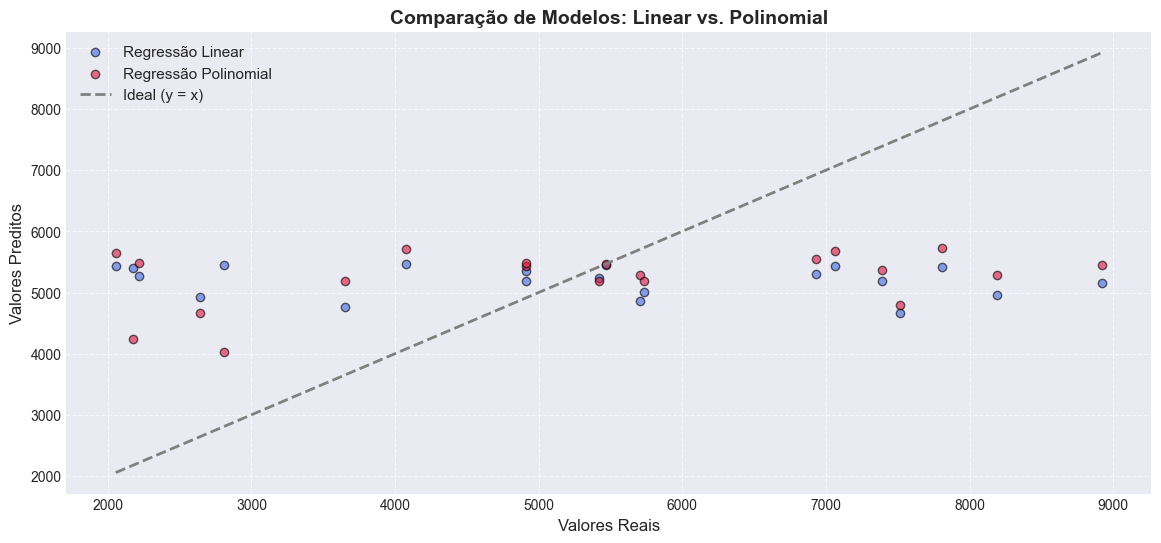

In [9]:
# Criando a figura
plt.figure(figsize=(14, 6))
plt.style.use('seaborn-v0_8-darkgrid') 

# Scatter plot para as previsões
plt.scatter(y_test, y_pred_linear, color='royalblue',
            alpha=0.6, edgecolors='k', label='Regressão Linear')
plt.scatter(y_test, y_pred_poly, color='crimson', alpha=0.6,
            edgecolors='k', label='Regressão Polinomial')

# Linha de referência (ideal)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         '--', color='gray', linewidth=2, label='Ideal (y = x)')

# Personalizações
plt.xlabel('Valores Reais', fontsize=12)
plt.ylabel('Valores Preditos', fontsize=12)
plt.title('Comparação de Modelos: Linear vs. Polinomial',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)

# Exibir gráfico
plt.show()

### Uso para Previsões

In [10]:
# Linear
# Valores para previsão
tempo_de_experiencia_1 = 37
numero_de_vendas_1 = 29
fator_sazonal_1 = 5

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Criar um DataFrame para a previsão com os mesmos nomes de colunas de X_train
X_prev1_sales = pd.DataFrame(
    [[tempo_de_experiencia_1, numero_de_vendas_1, fator_sazonal_1]], columns=X_train.columns)

receita_prev_linear_1 = linear_model.predict(X_prev1_sales)

print(receita_prev_linear_1)

# Valores para previsão
tempo_de_experiencia_2 = 45
numero_de_vendas_2 = 32
fator_sazonal_2 = 4

# Criar um DataFrame para a previsão com os mesmos nomes de colunas de X_train
X_prev2_sales = pd.DataFrame(
    [[tempo_de_experiencia_2, numero_de_vendas_2, fator_sazonal_2]], columns=X_train.columns)

receita_prev_linear_2 = linear_model.predict(X_prev2_sales)

print(receita_prev_linear_2)

[4965.05129851]
[4871.1166741]


In [11]:
tempo_de_experiencia_pred = 80  # meses de experiência
numero_de_vendas_pred = 150     # número de vendas
fator_sazonal_pred = 8          # fator sazonal

# Crie um array com os valores das variáveis para predição
X_new = np.array(
    [[tempo_de_experiencia_pred, numero_de_vendas_pred, fator_sazonal_pred]])

# Predição usando Regressão Linear
y_pred_linear_new = linear_model.predict(X_new)
print(f'Predição com Regressão Linear para os valores (tempo de experiência={tempo_de_experiencia_pred}, '
      f'número de vendas={numero_de_vendas_pred}, fator sazonal={fator_sazonal_pred}): '
      f'Receita Estimada = R$ {y_pred_linear_new[0]:,.2f}')

# Transformação dos valores para Regressão Polinomial
X_new_poly = poly_features.transform(X_new)

# Predição usando Regressão Polinomial
y_pred_poly_new = poly_model.predict(X_new_poly)
print(f'Predição com Regressão Polinomial para os valores (tempo de experiência={tempo_de_experiencia_pred}, '
      f'número de vendas={numero_de_vendas_pred}, fator sazonal={fator_sazonal_pred}): '
      f'Receita Estimada = R$ {y_pred_poly_new[0]:,.2f}')

Predição com Regressão Linear para os valores (tempo de experiência=80, número de vendas=150, fator sazonal=8): Receita Estimada = R$ 5,818.14
Predição com Regressão Polinomial para os valores (tempo de experiência=80, número de vendas=150, fator sazonal=8): Receita Estimada = R$ 4,300.52


c:\Users\Usuário\.virtualenvs\supervised_algorithms-WLhrZFFA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Usuário\.virtualenvs\supervised_algorithms-WLhrZFFA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
